In [380]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import sklearn.metrics as metrics
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
from math import sqrt

warnings.filterwarnings('ignore')





In [381]:

solution = pd.read_csv('/Users/elinc/Downloads/weatherAUS_test_sample_solution.csv')
train = pd.read_csv('/Users/elinc/Downloads/weatherAUS_train.csv')
test = pd.read_csv('/Users/elinc/Downloads/weatherAUS_test.csv')


In [382]:
train.shape

(101822, 23)

In [383]:
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2013-07-22,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,...,54.0,28.0,1019.4,1016.3,2.0,2.0,12.2,16.6,No,0
1,2015-02-28,Sale,15.4,25.7,0.0,NaN,NaN,W,67.0,NNE,...,84.0,66.0,1008.1,1005.1,8.0,8.0,18.8,24.3,No,1
2,2009-11-18,PerthAirport,15.2,22.2,7.2,5.2,3.3,NW,78.0,NW,...,68.0,91.0,1001.5,1000.1,7.0,8.0,20.1,16.5,Yes,1
3,2014-02-19,Richmond,19.9,26.4,0.0,2.8,NaN,SW,24.0,NNE,...,97.0,97.0,1004.6,1002.1,NaN,NaN,22.6,22.3,No,1
4,2015-10-04,Wollongong,19.3,32.9,0.0,NaN,NaN,W,48.0,NNW,...,46.0,15.0,1022.8,1020.7,NaN,NaN,22.1,32.6,No,0


In [384]:
col_names = train.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [385]:
nan_count_train = train.isna().sum()
print(nan_count_train, train.shape)


Date                 0
Location             0
MinTemp           1027
MaxTemp            875
Rainfall          2300
Evaporation      43889
Sunshine         48800
WindGustDir       7318
WindGustSpeed     7272
WindDir9am        7391
WindDir3pm        2986
WindSpeed9am      1272
WindSpeed3pm      2159
Humidity9am       1854
Humidity3pm       3160
Pressure9am      10554
Pressure3pm      10518
Cloud9am         38989
Cloud3pm         41420
Temp9am           1226
Temp3pm           2518
RainToday         2300
RainTomorrow         0
dtype: int64 (101822, 23)


In [386]:
train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2013-07-22,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,...,54.0,28.0,1019.4,1016.3,2.0,2.0,12.2,16.6,No,0
1,2015-02-28,Sale,15.4,25.7,0.0,NaN,NaN,W,67.0,NNE,...,84.0,66.0,1008.1,1005.1,8.0,8.0,18.8,24.3,No,1
2,2009-11-18,PerthAirport,15.2,22.2,7.2,5.2,3.3,NW,78.0,NW,...,68.0,91.0,1001.5,1000.1,7.0,8.0,20.1,16.5,Yes,1
3,2014-02-19,Richmond,19.9,26.4,0.0,2.8,NaN,SW,24.0,NNE,...,97.0,97.0,1004.6,1002.1,NaN,NaN,22.6,22.3,No,1
4,2015-10-04,Wollongong,19.3,32.9,0.0,NaN,NaN,W,48.0,NNW,...,46.0,15.0,1022.8,1020.7,NaN,NaN,22.1,32.6,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101817,2015-07-19,Walpole,11.6,17.0,3.0,NaN,NaN,NNW,50.0,NNW,...,88.0,90.0,1013.2,1008.9,NaN,NaN,14.0,15.0,Yes,1
101818,2015-06-25,PerthAirport,7.6,20.4,0.0,2.4,9.2,ENE,30.0,NE,...,64.0,35.0,1027.7,1024.2,0.0,1.0,12.1,19.9,No,0
101819,2016-06-05,Newcastle,13.8,17.3,96.0,NaN,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,NaN,8.0,NaN,14.5,NaN,Yes,1
101820,2011-06-13,Richmond,10.5,14.6,4.0,NaN,NaN,S,33.0,SSW,...,82.0,90.0,1024.6,1021.6,NaN,NaN,12.2,13.9,Yes,1


In [387]:
# find categorical variables

categorical = [var for var in train.columns if train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [388]:
train[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2013-07-22,Sydney,WNW,WNW,W,No
1,2015-02-28,Sale,W,NNE,WSW,No
2,2009-11-18,PerthAirport,NW,NW,WSW,Yes
3,2014-02-19,Richmond,SW,NNE,WSW,No
4,2015-10-04,Wollongong,W,NNW,W,No


Изучаем категориальные признаки!!!!!!!!!!!!!!!!!!!!!

In [389]:
for var in categorical: 
    
    print(train[var].value_counts())

Date
2015-01-12    45
2015-03-17    44
2014-11-29    43
2015-10-01    43
2013-07-09    43
              ..
2008-02-21     1
2008-01-11     1
2008-01-25     1
2008-01-26     1
2008-04-20     1
Name: count, Length: 3408, dtype: int64
Location
Canberra            2431
Sydney              2340
Darwin              2250
Perth               2240
Hobart              2234
Melbourne           2223
Brisbane            2222
Adelaide            2215
Cairns              2170
Albury              2168
MountGambier        2166
Newcastle           2162
Launceston          2162
Ballarat            2157
Williamtown         2139
Nuriootpa           2137
GoldCoast           2137
Townsville          2136
Witchcliffe         2131
WaggaWagga          2126
Albany              2123
SalmonGums          2122
MelbourneAirport    2121
Tuggeranong         2121
SydneyAirport       2117
Cobar               2117
Wollongong          2115
Woomera             2113
Bendigo             2112
Sale                2104
PerthAirp

In [390]:
#количество уникальных значений

for var in categorical:
    
    print(var, ' contains ', len(train[var].unique()), ' labels')

Date  contains  3408  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels


In [391]:
train['Date'] = pd.to_datetime(train['Date'])

In [392]:
train['Year'] = train['Date'].dt.year

train['Year'].head()

0    2013
1    2015
2    2009
3    2014
4    2015
Name: Year, dtype: int32

In [393]:
print(train['Year'].value_counts())

Year
2016    12588
2014    12539
2015    12461
2009    11834
2010    11803
2013    11463
2011    10789
2012    10691
2017     6023
2008     1584
2007       47
Name: count, dtype: int64


In [394]:
train['Month'] = train['Date'].dt.month
train['Month'].head()

0     7
1     2
2    11
3     2
4    10
Name: Month, dtype: int32

In [395]:
print(train['Month'].value_counts())

Month
5     9460
3     9382
1     9192
6     8766
10    8457
7     8422
8     8351
11    8165
4     8146
9     8143
12    7810
2     7528
Name: count, dtype: int64


In [396]:
train['Day'] = train['Date'].dt.day

train['Day'].head()

0    22
1    28
2    18
3    19
4     4
Name: Day, dtype: int32

In [397]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101822 entries, 0 to 101821
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           101822 non-null  datetime64[ns]
 1   Location       101822 non-null  object        
 2   MinTemp        100795 non-null  float64       
 3   MaxTemp        100947 non-null  float64       
 4   Rainfall       99522 non-null   float64       
 5   Evaporation    57933 non-null   float64       
 6   Sunshine       53022 non-null   float64       
 7   WindGustDir    94504 non-null   object        
 8   WindGustSpeed  94550 non-null   float64       
 9   WindDir9am     94431 non-null   object        
 10  WindDir3pm     98836 non-null   object        
 11  WindSpeed9am   100550 non-null  float64       
 12  WindSpeed3pm   99663 non-null   float64       
 13  Humidity9am    99968 non-null   float64       
 14  Humidity3pm    98662 non-null   float64       
 15  

In [398]:
train.drop('Date', axis=1, inplace = True)

In [399]:
train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,W,...,1016.3,2.0,2.0,12.2,16.6,No,0,2013,7,22
1,Sale,15.4,25.7,0.0,NaN,NaN,W,67.0,NNE,WSW,...,1005.1,8.0,8.0,18.8,24.3,No,1,2015,2,28
2,PerthAirport,15.2,22.2,7.2,5.2,3.3,NW,78.0,NW,WSW,...,1000.1,7.0,8.0,20.1,16.5,Yes,1,2009,11,18
3,Richmond,19.9,26.4,0.0,2.8,NaN,SW,24.0,NNE,WSW,...,1002.1,NaN,NaN,22.6,22.3,No,1,2014,2,19
4,Wollongong,19.3,32.9,0.0,NaN,NaN,W,48.0,NNW,W,...,1020.7,NaN,NaN,22.1,32.6,No,0,2015,10,4


In [400]:
categorical = [var for var in train.columns if train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

train[categorical].isnull().sum()

There are 5 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Location          0
WindGustDir    7318
WindDir9am     7391
WindDir3pm     2986
RainToday      2300
dtype: int64

In [401]:
numerical = [var for var in train.columns if train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 20 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow', 'Year', 'Month', 'Day']


In [402]:
train[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Day
0,8.7,17.2,0.0,3.8,9.9,54.0,17.0,26.0,54.0,28.0,1019.4,1016.3,2.0,2.0,12.2,16.6,0,2013,7,22
1,15.4,25.7,0.0,NaN,NaN,67.0,11.0,9.0,84.0,66.0,1008.1,1005.1,8.0,8.0,18.8,24.3,1,2015,2,28
2,15.2,22.2,7.2,5.2,3.3,78.0,33.0,28.0,68.0,91.0,1001.5,1000.1,7.0,8.0,20.1,16.5,1,2009,11,18
3,19.9,26.4,0.0,2.8,NaN,24.0,13.0,9.0,97.0,97.0,1004.6,1002.1,NaN,NaN,22.6,22.3,1,2014,2,19
4,19.3,32.9,0.0,NaN,NaN,48.0,19.0,22.0,46.0,15.0,1022.8,1020.7,NaN,NaN,22.1,32.6,0,2015,10,4


In [403]:
print(round(train[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  100795.0  100947.0   99522.0      57933.0   53022.0        94550.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            7.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        32.0      48.0     368.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      100550.0       99663.0      99968.0      98662.0      91268.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

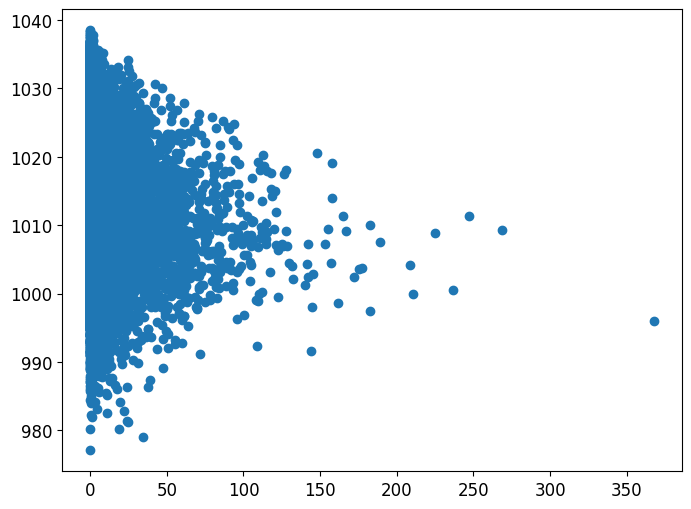

In [404]:
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('xkcd:white')
plt.scatter(train. Rainfall, train.Pressure3pm)
plt.show()

Text(0, 0.5, 'WindSpeed3pm')

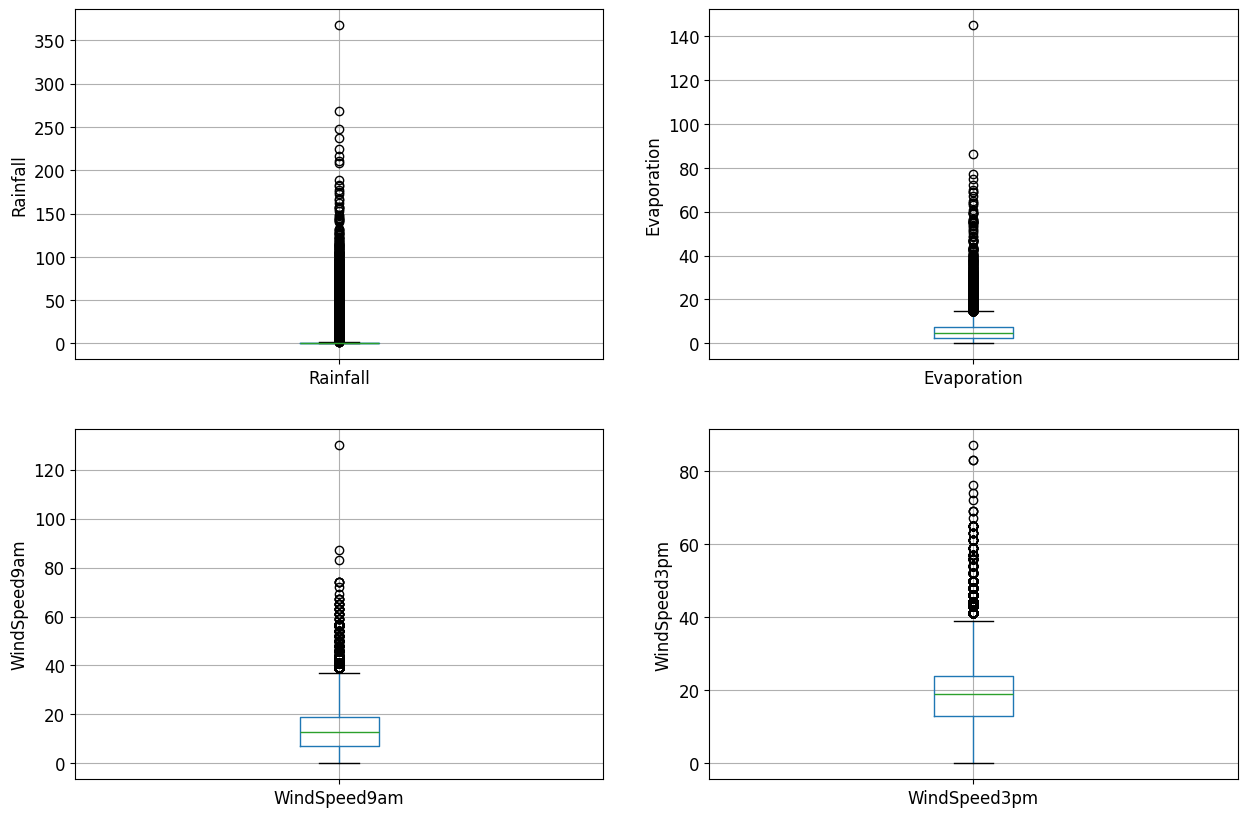

In [405]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = train.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = train.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = train.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = train.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

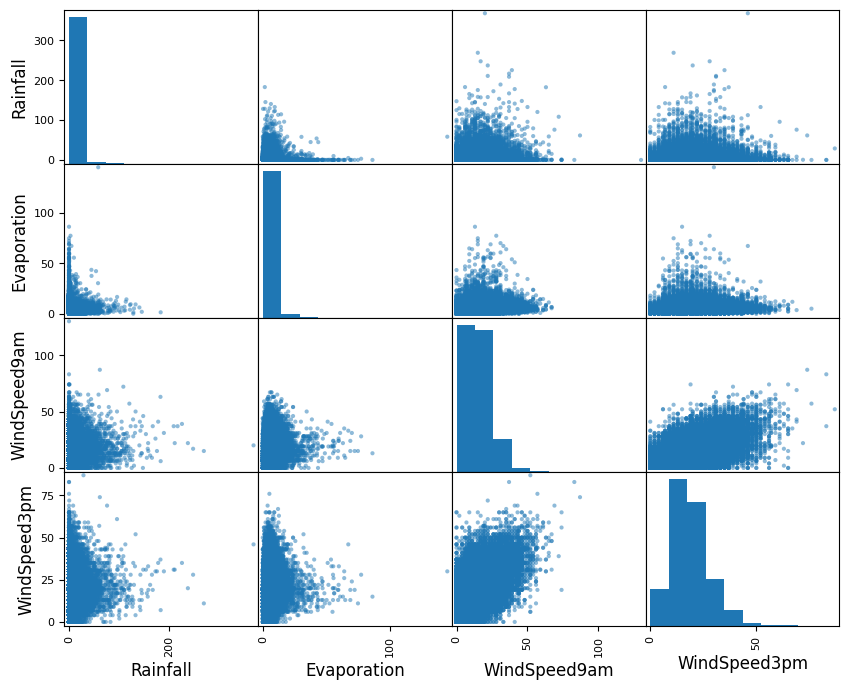

In [406]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('xkcd:white')

cols = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
scatter_matrix(train[cols], ax=ax)
plt.show()

Text(0, 0.5, 'RainTomorrow')

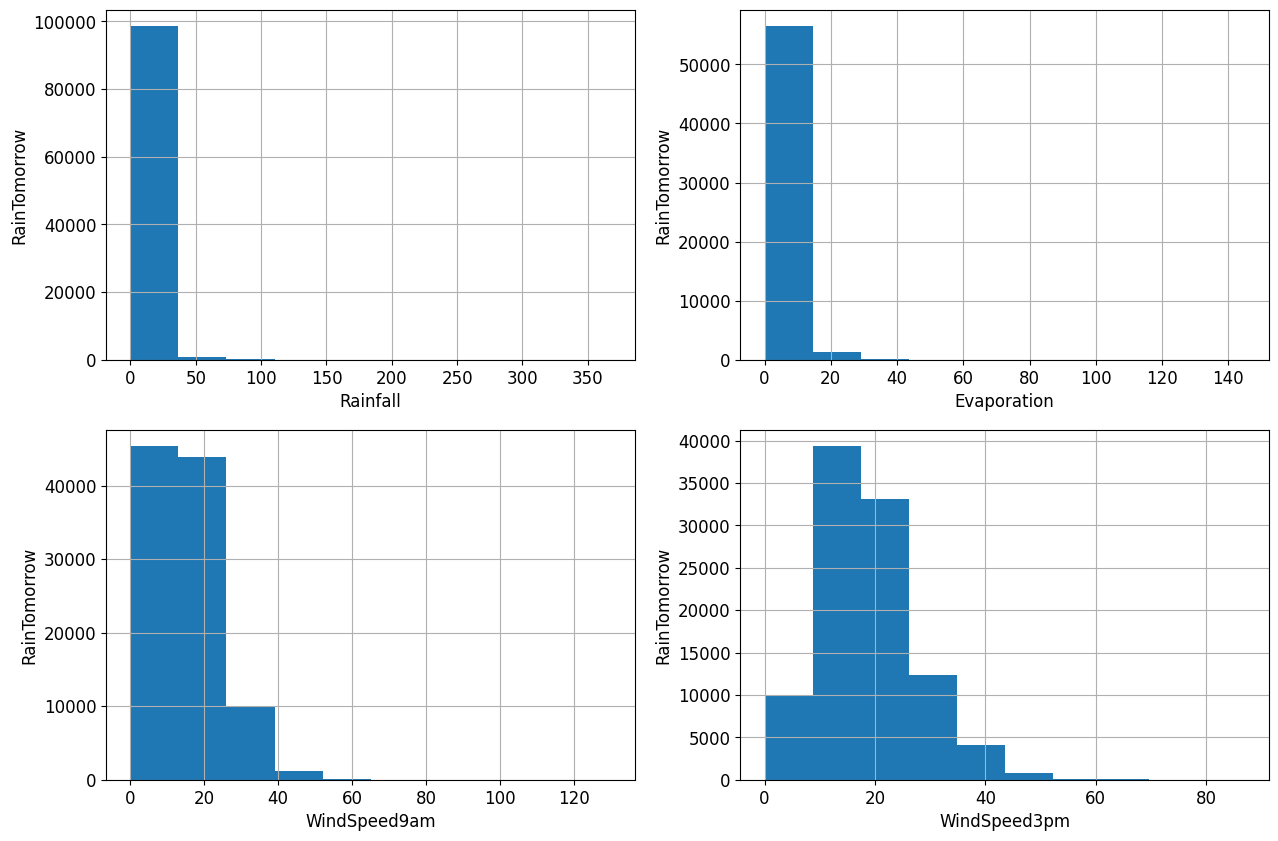

In [407]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = train.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = train.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = train.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = train.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [408]:
IQR = train.Rainfall.quantile(0.75) - train.Rainfall.quantile(0.25)
Lower_fence = train.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = train.Rainfall.quantile(0.75) + (IQR * 1.5)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.2000000000000002 or > 2.0


In [409]:

IQR = train.Evaporation.quantile(0.75) - train.Evaporation.quantile(0.25)
Lower_fence = train.Evaporation.quantile(0.25) - (IQR * 1.5)
Upper_fence = train.Evaporation.quantile(0.75) + (IQR * 1.5)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -4.600000000000001 or > 14.600000000000001


In [410]:
IQR = train.WindSpeed9am.quantile(0.75) - train.WindSpeed9am.quantile(0.25)
Lower_fence = train.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = train.WindSpeed9am.quantile(0.75) + (IQR * 1.5)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -11.0 or > 37.0


In [411]:
IQR = train.WindSpeed3pm.quantile(0.75) - train.WindSpeed3pm.quantile(0.25)
Lower_fence = train.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = train.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [412]:
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)      

KeyError: 'RainTomorrow'

In [ ]:
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [ ]:
X = train.drop(['RainTomorrow'], axis=1) #вектор признаков

y = train['RainTomorrow'] #целевая

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

In [ ]:
print(X_train.columns)

In [ ]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical



In [ ]:

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 1.5)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 14.3)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 36.5)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 65.0)

In [ ]:
X_train[numerical].describe()

In [ ]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

In [ ]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
X_train.head()

In [ ]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [ ]:
X_test.head()

In [ ]:
X_train.describe()


In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

In [ ]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

In [ ]:
logreg.predict_proba(X_test)[:,0]

In [ ]:
logreg.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

In [ ]:

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
clf = LogisticRegression()
clf.C = 100
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

precision, recall, th_pr = precision_recall_curve(y_test, a_x)
fpr, tpr, th_roc = roc_curve(y_test, a_x)

print("AUC_ROC: %0.5f" % auc(fpr, tpr))
print("AUC_PR: %0.5f"% auc(recall, precision))

In [ ]:
test


In [ ]:
test = test.drop(['Id'], axis = 1)

In [ ]:
test

In [ ]:
test = test.dropna()

In [ ]:
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day


In [ ]:
test.drop('Date', axis=1, inplace = True)

In [ ]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

test = encoder.fit_transform(test)

In [ ]:
test = pd.concat([test[numerical], test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(test.Location), 
                     pd.get_dummies(test.WindGustDir),
                     pd.get_dummies(test.WindDir9am),
                     pd.get_dummies(test.WindDir3pm)], axis=1)

In [ ]:
test.head()

In [ ]:
test.columns

In [ ]:
cols

In [ ]:
test = logreg.predict(test)
test

In [ ]:
solve = pd.DataFrame((test))
solve["Id"] = solve.index
solve.to_csv("data13.csv")

In [ ]:
df = pd.DataFrame(solve)
df["Id"] = df.index
df.to_csv('result_final.csv', index = False)